# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.python.keras.engine.training_eager_v1 import train_on_batch
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV

from xgboost import XGBClassifier



2025-09-09 12:51:49.926493: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-09 12:51:49.926726: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-09 12:51:49.960406: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-09 12:51:50.696240: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")



In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [7]:
train_df.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_df.groupby(['Sex'],as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train_df.groupby(['SibSp'],as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train_df.groupby(['Parch'],as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [11]:
train_df['Family_Size'] = train_df['SibSp']+ train_df['Parch'] + 1
test_df['Family_Size'] = train_df['SibSp']+ train_df['Parch'] + 1

In [12]:
train_df.groupby(['Family_Size'])['Survived'].mean()

Family_Size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [13]:
family_map = {1:'Alone',2:'Small',3:'Small',4:'Small',5:'Medium',6:'Medium',7:'Large',8:'Large',9:'Large',10:'Large',11:'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map(family_map)

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone


In [15]:
train_df.groupby(['Embarked'])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

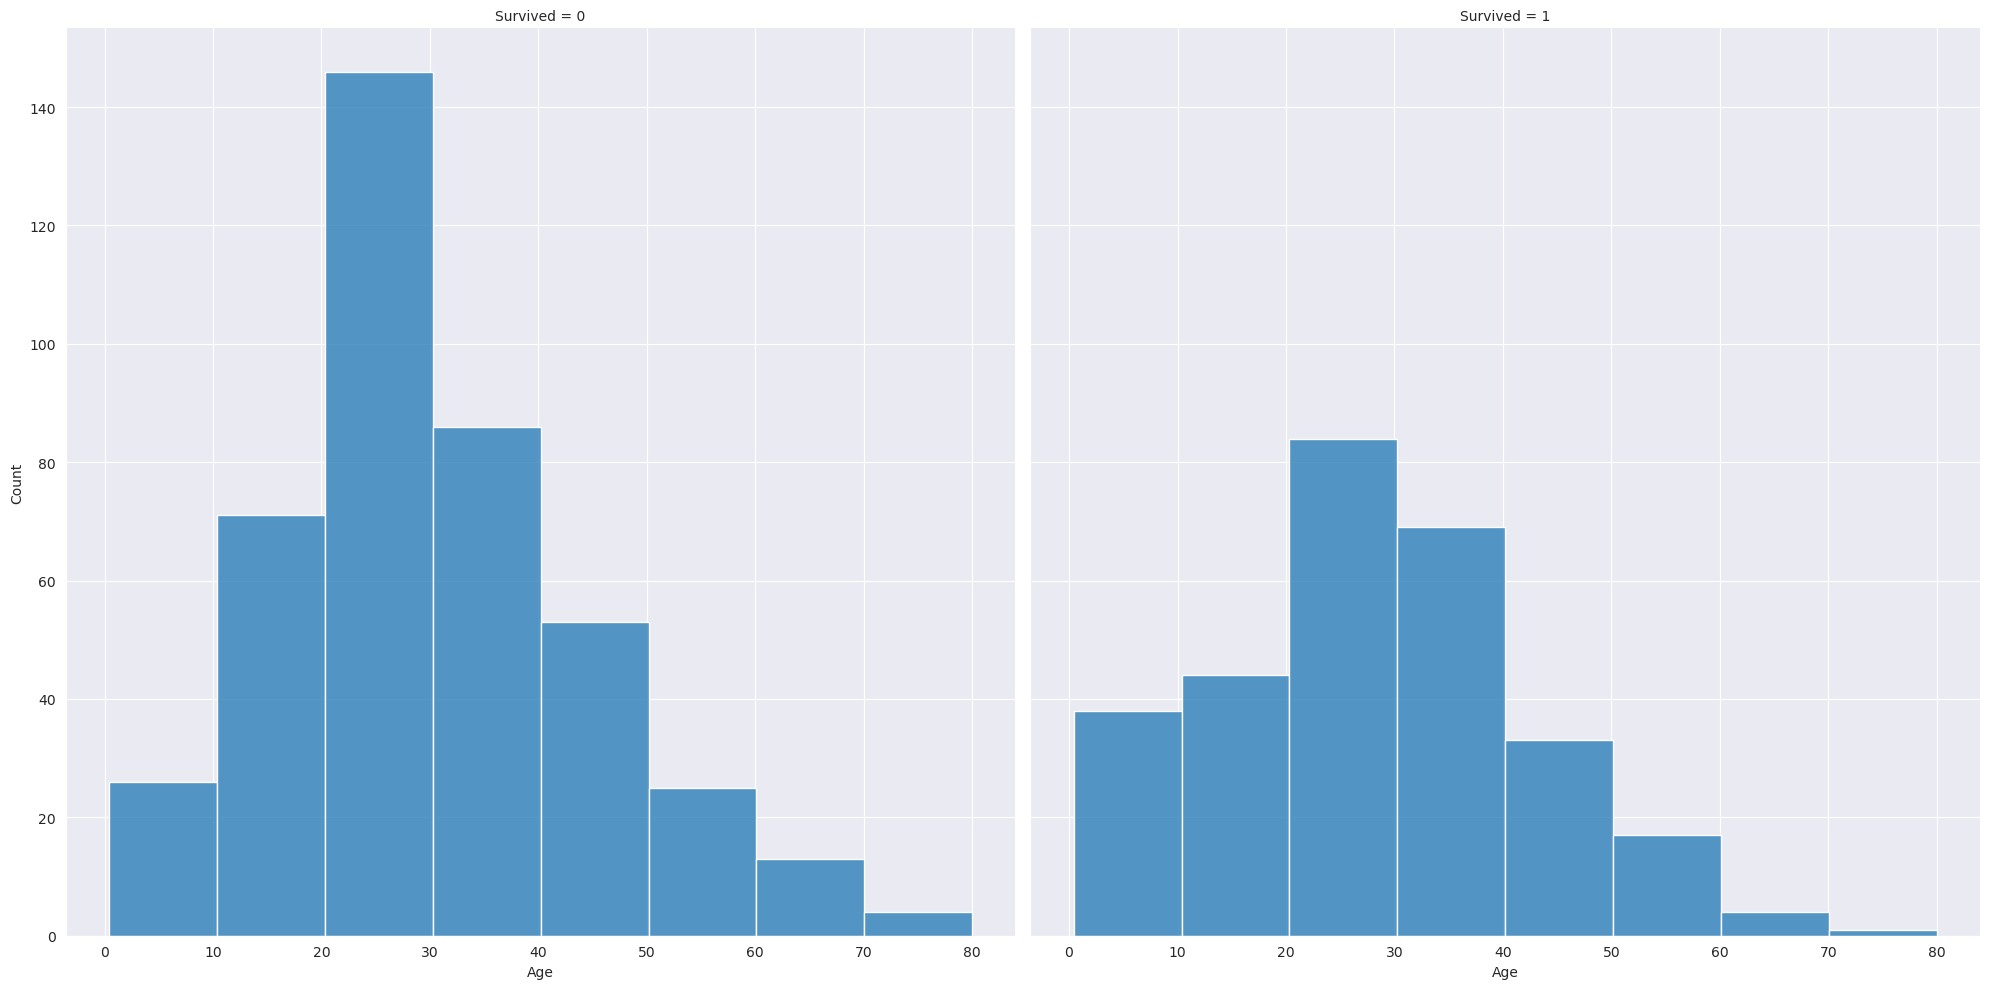

In [16]:


sns.displot(train_df, x='Age',col='Survived',binwidth = 10,height=10)
plt.show()

In [17]:

train_df['Age'] = pd.qcut(train_df['Age'],8).cat.codes
test_df['Age'] = pd.qcut(test_df['Age'],8).cat.codes



In [18]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,8.0500,NaN,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,13.0000,NaN,S,1,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,30.0000,B42,S,1,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1,1,2,W./C. 6607,23.4500,NaN,S,4,Small
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,30.0000,C148,C,1,Alone


In [19]:
train_df['Fare'] = pd.qcut(train_df['Fare'],6).cat.codes
test_df['Fare'] = pd.qcut(test_df['Fare'],6).cat.codes

In [20]:
train_df['Title'] = train_df['Name'].str.split(pat=",",expand = True)[1].str.split(pat=".",expand = True)[0].apply(lambda x:x.strip())
test_df['Title'] = test_df['Name'].str.split(pat=",",expand = True)[1].str.split(pat=".",expand = True)[0].apply(lambda x:x.strip())

In [21]:
train_df['Title'] = train_df['Title'].replace(
    {
        'Capt': 'Military',
        'Col' : 'Military',
        'Major':'Military',
        'Jonkheer':'Noble',
        'Don':'Noble',
        'Lady':'Noble',
        'Mme':'Noble'
    }
)
test_df['Title'] = test_df['Title'].replace(
    {
        'Capt': 'Military',
        'Col' : 'Military',
        'Major':'Military',
        'Jonkheer':'Noble',
        'Don':'Noble',
        'Lady':'Noble',
        'Mme':'Noble'
    }
)

In [22]:
train_df.groupby(['Title'])['Survived'].agg(['count','mean'])

,count,mean
Title,,
Dr,7,0.428571
Master,40,0.575000
Military,5,0.400000
Miss,182,0.697802
Mlle,2,1.000000
Mr,517,0.156673
Mrs,125,0.792000
Ms,1,1.000000
Noble,4,0.500000


In [23]:
train_df['NameLength'] = train_df['Name'].apply(lambda x: len(x))
test_df['NameLength'] = test_df['Name'].apply(lambda x: len(x))

In [24]:
train_df['Survived']==0

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Survived, Length: 891, dtype: bool

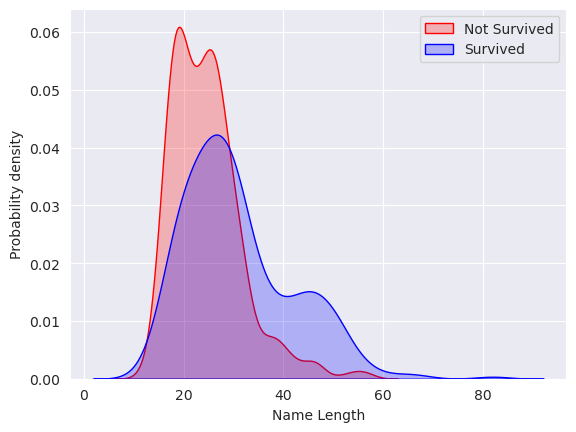

In [25]:
g=sns.kdeplot(train_df['NameLength']  [(train_df['Survived']==0) & (train_df['NameLength'].notnull())], color='Red', fill=True)
g=sns.kdeplot(train_df['NameLength']  [(train_df['Survived']==1) & (train_df['NameLength'].notnull())],ax=g, color='Blue', fill=True)
g.set_xlabel('Name Length')
g.set_ylabel('Probability density')
g=g.legend(['Not Survived','Survived'])
plt.show()

In [26]:
train_df['NameLength_GB'] = pd.qcut(train_df['NameLength'],8).cat.codes
test_df['NameLength_GB'] = pd.qcut(test_df['NameLength'],8).cat.codes

In [27]:
train_df.groupby(['NameLength_GB'])['Survived'].agg(['count','mean'])

,count,mean
NameLength_GB,,
0,140,0.214286
1,103,0.252427
2,117,0.307692
3,98,0.346939
4,99,0.292929
5,112,0.428571
6,116,0.517241
7,106,0.745283


In [28]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: x.split()[-1])
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: x.split()[-1])

In [29]:
train_df.groupby(['TicketNumber'])['Survived'].agg(['count','mean']).sort_values('count',ascending=False)

,count,mean
TicketNumber,,
1601,7,0.714286
2343,7,0.000000
347082,7,0.000000
347088,6,0.000000
3101295,6,0.000000
...,...,...
2667,1,1.000000
2669,1,0.000000
26707,1,0.000000


In [30]:
train_df['TicketNumberCount'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCount'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [31]:
train_df.groupby(['TicketNumberCount'])['Survived'].agg(['count','mean']).sort_values('count',ascending=False)

,count,mean
TicketNumberCount,,
1,544,0.295956
2,188,0.569149
3,66,0.712121
4,44,0.500000
7,21,0.238095
6,18,0.000000
5,10,0.000000


In [32]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: x[0])
test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = test_df['Cabin'].apply(lambda x: x[0])

In [33]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [34]:
train_df.shape

(891, 19)

In [35]:
test_df.shape

(418, 18)

In [36]:
train_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PassengerId          891 non-null    int64 
 1   Survived             891 non-null    int64 
 2   Pclass               891 non-null    int64 
 3   Name                 891 non-null    object
 4   Sex                  891 non-null    object
 5   Age                  891 non-null    int8  
 6   SibSp                891 non-null    int64 
 7   Parch                891 non-null    int64 
 8   Ticket               891 non-null    object
 9   Fare                 891 non-null    int8  
 10  Cabin                891 non-null    object
 11  Embarked             889 non-null    object
 12  Family_Size          891 non-null    int64 
 13  Family_Size_Grouped  891 non-null    object
 14  Title                891 non-null    object
 15  NameLength           891 non-null    int64 
 16  NameLeng

In [37]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Title', 'NameLength', 'NameLength_GB',
       'TicketNumber', 'TicketNumberCount'],
      dtype='object')

In [38]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [39]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [40]:
train_df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

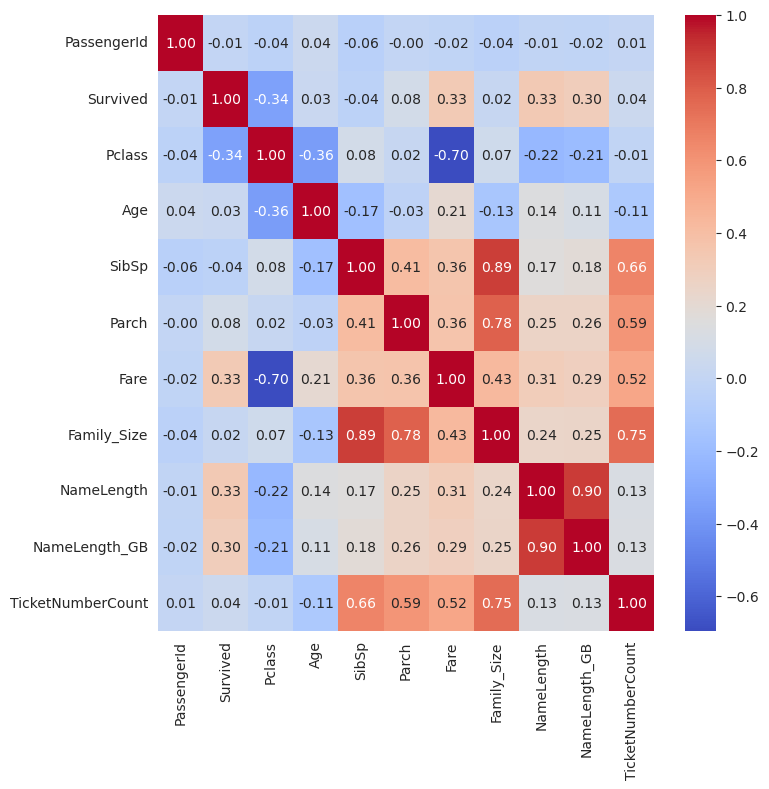

In [41]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', fmt = ".2f")
plt.show()

In [42]:
train_df.groupby('Survived')['Survived'].agg(['count'])

,count
Survived,
0,549
1,342


In [43]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Title,NameLength,NameLength_GB,TicketNumber,TicketNumberCount
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,U,S,2,Small,Mr,23,2,21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,5,C,C,2,Small,Mrs,51,7,17599,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,U,S,1,Alone,Miss,22,2,3101282,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,5,C,S,2,Small,Mrs,44,7,113803,2
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,U,S,1,Alone,Mr,24,3,373450,1


In [44]:
X = train_df.drop(['Survived','SibSp','Parch','NameLength','Name','TicketNumber','Ticket'],axis=1)
y = train_df['Survived']
X_test = test_df.drop(['SibSp','Parch','NameLength','Name','TicketNumber','Ticket'],axis=1)

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,stratify=y, random_state=41)

In [46]:
ordinal_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [47]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family_Size', 'Family_Size_Grouped', 'Title', 'NameLength_GB',
       'TicketNumberCount'],
      dtype='object')

In [48]:
from sklearn.compose import ColumnTransformer
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex','Embarked','Cabin']
col_trans = ColumnTransformer(transformers=[
 ('ord_pipeline', ordinal_pipeline, ode_cols),
 ('ohe_pipeline', ohe_pipeline, ohe_cols),
 ('impute', SI, ['Age']),
    ('passthrough', 'passthrough', ['Pclass',  'NameLength_GB',  'Fare', 'TicketNumberCount'])
 ],
 remainder='drop',
 n_jobs=-1)

In [49]:
from scipy.stats import randint
from scipy.stats import loguniform
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
rfc = [RandomForestClassifier(), {
    "n_estimators": randint(150, 500),
    "min_samples_split": randint(5, 16),
    "max_depth": randint(10, 21),
    "min_samples_leaf": randint(2, 7),
    "criterion": ["gini", "entropy"],}]

dtc = [DecisionTreeClassifier(),
{
    "min_samples_split": randint(5, 16),
    "max_depth": randint(10, 40),
    "min_samples_leaf": randint(1, 7),
    "criterion": ["gini", "entropy"],
}]

knn = [KNeighborsClassifier(),
{
    'n_neighbors': randint(2,20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2,3,4],
}]

gnb = [GaussianNB(),
       {
    'var_smoothing': loguniform(1e-9,1e-7),
}]

lr = [LogisticRegression(max_iter=1000), {
    'C': loguniform(1e-4, 1),
}]
dtc_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,min_samples_leaf=4, min_samples_split=10)
svc_2 = SVC(probability=True, C=10, kernel='rbf')
lr_2 = LogisticRegression(C=0.1)
abc = [AdaBoostClassifier(),

{
    'estimator': [dtc_2, svc_2, lr_2],
    'n_estimators':  [5, 10, 25, 50, 100],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [(0.97 + x / 100) for x in range(1, 7)]
}
       ]
classifiers = [rfc,dtc,knn,gnb,lr,abc]

In [52]:

for i, classifier in enumerate(classifiers):
    CV = RandomizedSearchCV(estimator=classifier[0], param_distributions=classifier[1], cv=StratifiedKFold(n_splits=5),verbose=4)
    pipefinal = make_pipeline(col_trans, CV)
    pipefinal.fit(X_train, y_train)
    print(CV.best_params_)
    print(CV.best_score_)
    CV.refit

    Y_pred = pipefinal.predict(X_test)
    submission = pd.DataFrame({
        'PassengerId': test_df['PassengerId'],
        'Survived': Y_pred
    })
    submission.to_csv(f'/home/wolbar/self-projects/machine_learning/titanic/sub_{i}.csv', index=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=10, n_estimators=215;, score=0.755 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=10, n_estimators=215;, score=0.839 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=10, n_estimators=215;, score=0.782 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=10, n_estimators=215;, score=0.810 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=10, n_estimators=215;, score=0.768 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=13, n_estimators=258;, score=0.748 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=13, n_estimators=258;, score=0.839 total time=  

/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/minicon

[CV 1/5] END algorithm=SAMME, estimator=SVC(C=10, probability=True), learning_rate=0.98, n_estimators=25;, score=0.636 total time=   0.6s


/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 2/5] END algorithm=SAMME, estimator=SVC(C=10, probability=True), learning_rate=0.98, n_estimators=25;, score=0.692 total time=   1.2s


/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 3/5] END algorithm=SAMME, estimator=SVC(C=10, probability=True), learning_rate=0.98, n_estimators=25;, score=0.761 total time=   0.6s


/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 4/5] END algorithm=SAMME, estimator=SVC(C=10, probability=True), learning_rate=0.98, n_estimators=25;, score=0.775 total time=   0.7s


/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 5/5] END algorithm=SAMME, estimator=SVC(C=10, probability=True), learning_rate=0.98, n_estimators=25;, score=0.704 total time=   0.6s
[CV 1/5] END algorithm=SAMME.R, estimator=SVC(C=10, probability=True), learning_rate=1.03, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, estimator=SVC(C=10, probability=True), learning_rate=1.03, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, estimator=SVC(C=10, probability=True), learning_rate=1.03, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, estimator=SVC(C=10, probability=True), learning_rate=1.03, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, estimator=SVC(C=10, probability=True), learning_rate=1.03, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, estimator=LogisticRegression(C=0.1), learning_rate=0.99, n_estimators=50;, score=0.699 total time=   0.1s
[CV 2/5] END algorithm=SAMME, e

/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 4/5] END algorithm=SAMME, estimator=LogisticRegression(C=0.1), learning_rate=0.99, n_estimators=50;, score=0.775 total time=   0.0s
[CV 5/5] END algorithm=SAMME, estimator=LogisticRegression(C=0.1), learning_rate=0.99, n_estimators=50;, score=0.725 total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, estimator=SVC(C=10, probability=True), learning_rate=0.98, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, estimator=SVC(C=10, probability=True), learning_rate=0.98, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, estimator=SVC(C=10, probability=True), learning_rate=0.98, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, estimator=SVC(C=10, probability=True), learning_rate=0.98, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, estimator=SVC(C=10, probability=True), learning_rate=0.98, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, estima

/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 1/5] END algorithm=SAMME, estimator=SVC(C=10, probability=True), learning_rate=1.0, n_estimators=100;, score=0.629 total time=   4.7s


/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 2/5] END algorithm=SAMME, estimator=SVC(C=10, probability=True), learning_rate=1.0, n_estimators=100;, score=0.699 total time=   0.2s


/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 3/5] END algorithm=SAMME, estimator=SVC(C=10, probability=True), learning_rate=1.0, n_estimators=100;, score=0.761 total time=   0.2s


/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 4/5] END algorithm=SAMME, estimator=SVC(C=10, probability=True), learning_rate=1.0, n_estimators=100;, score=0.676 total time=   0.2s


/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 5/5] END algorithm=SAMME, estimator=SVC(C=10, probability=True), learning_rate=1.0, n_estimators=100;, score=0.662 total time=   0.2s
[CV 1/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), learning_rate=1.01, n_estimators=25;, score=0.748 total time=   0.0s
[CV 2/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), learning_rate=1.01, n_estimators=25;, score=0.776 total time=   0.0s
[CV 3/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), learning_rate=1.01, n_estimators=25;, score=0.746 total time=   0.0s
[CV 4/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10),

/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/minicon

[CV 1/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), learning_rate=1.01, n_estimators=50;, score=0.734 total time=   0.1s
[CV 2/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), learning_rate=1.01, n_estimators=50;, score=0.783 total time=   0.1s
[CV 3/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), learning_rate=1.01, n_estimators=50;, score=0.746 total time=   0.1s


/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV 4/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), learning_rate=1.01, n_estimators=50;, score=0.838 total time=   0.1s
[CV 5/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), learning_rate=1.01, n_estimators=50;, score=0.810 total time=   0.1s
{'n_estimators': 50, 'learning_rate': 1.01, 'estimator': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), 'algorithm': 'SAMME'}
0.7823697429331232


/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/wolbar/miniconda3/envs/ml_projects/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~

In [53]:
vc2 = VotingClassifier([
    ('abc', abc[0]),
    ('knn', knn[0]),
    ('lr', lr[0])
], voting='soft')
pipefinal = make_pipeline(col_trans, vc2)
pipefinal.fit(X_train, y_train)
Y_pred2 = pipefinal.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})
submission.to_csv('/home/wolbar/self-projects/machine_learning/titanic/sub.csv', index=False)

In [57]:
X_train.shape

(712, 12)

In [98]:
from keras.callbacks import TensorBoard
import keras
import datetime
from keras import layers
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)

def build_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),

        layers.Dense(12, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def model_builder(meta):
    return build_model(meta["n_features_in_"])


nn = KerasClassifier(
    model=model_builder,
    epochs=31,
    batch_size=32,
    verbose=1,
    validation_split=0.2,
    fit__callbacks=[tensorboard_cb]
)

pipefinal = make_pipeline(col_trans, nn)

pipefinal.fit(X_train, y_train)



Epoch 1/31
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4411 - loss: 0.7405 - val_accuracy: 0.5035 - val_loss: 0.7004
Epoch 2/31
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5659 - loss: 0.6806 - val_accuracy: 0.5874 - val_loss: 0.6715
Epoch 3/31
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6819 - loss: 0.6436 - val_accuracy: 0.6783 - val_loss: 0.6540
Epoch 4/31
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7170 - loss: 0.6177 - val_accuracy: 0.6643 - val_loss: 0.6370
Epoch 5/31
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7241 - loss: 0.5936 - val_accuracy: 0.6643 - val_loss: 0.6231
Epoch 6/31
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7452 - loss: 0.5747 - val_accuracy: 0.6853 - val_loss: 0.6098
Epoch 7/31
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.5581 - val_accuracy: 0.6853 - val_loss: 0.5944
Epoch 8/31
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7627 - loss: 0.5433 - val_accuracy: 0.6923 - val_loss:

,steps,"[('columntransformer', ...), ('kerasclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord_pipeline', ...), ('ohe_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [99]:

Y_pred2 = pipefinal.predict(X_test)
submission = pd.DataFrame({
        'PassengerId': test_df['PassengerId'],
        'Survived': Y_pred2
    })
submission.to_csv(f'/home/wolbar/self-projects/machine_learning/titanic/Neural_minus_layer_31_sub.csv', index=False)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [106]:
y_train_pred = pipefinal.predict(X_train)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix: \n", conf)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
Confusion Matrix: 
 [[375  64]
 [ 74 199]]


In [109]:
from sklearn.metrics import classification_report

print (classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       449
           1       0.73      0.76      0.74       263

    accuracy                           0.81       712
   macro avg       0.79      0.80      0.79       712
weighted avg       0.81      0.81      0.81       712

